In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptron de Rosenblatt

In [37]:
class Perceptron:

    # Inicializador
    def __init__(self, x, y, addBias = True, bias = 1):
        self.x = x
        if addBias:
            biasColumn = np.full((x.shape[0], 1), bias)
            self.x = np.concatenate((biasColumn, self.x), axis=1)
        self.y = y
        self.w = np.zeros(self.x.shape[1]).reshape(-1,1)
    
    # Setter
    def setXY(self, x, y):
        self.x = x
        self.y = y
        self.w = np.ones(self.x.shape[1]).reshape(-1,1)
    
    # Getters
    def getX(self):
        return self.x

    def getY(self):
        return self.y
    
    def getW(self):
        return self.w

    # Apenas para debug
    def getDecisionBoundary(self):
        # Extract the weights
        w0 = self.w[0]
        w1 = self.w[1]
        w2 = self.w[2]

        # Define the x range for plotting the decision boundary line
        x_range = np.linspace(np.min(self.x[:, 1]), np.max(self.x[:, 1]), 100)

        # Compute the corresponding y values for the decision boundary line
        y_range = (-w0 - w1 * x_range) / w2

        return x_range, y_range


    # Métodos

    def sign(self, z):
        newz = np.sign(z)
        newz[newz == 0] = 1
        return newz
    
    def cost(self):
        cost = np.zeros(self.y.shape)
        yhat = self.x @ self.w
        cost = np.maximum(cost, -(self.y * yhat))
        
        return cost.sum()

    def train(self, alpha = 1, max_iterations = 100):
        e = np.zeros(self.y.shape)
        zero_error = np.zeros(e.shape)
        cost = np.array([])
        # iteration = 0

        for it in range(max_iterations):
            for i in range(self.x.shape[0]):
                yhat = self.sign(self.x[i] @ self.w)
                e[i] = self.y[i] - yhat
                self.w += (alpha * (e[i] * self.x[i])).reshape(-1,1)
                cost = np.append(cost, self.cost())
                # iteration += 1

            if np.array_equal(e, zero_error):
                break
        
        # print(iteration)

        return cost
    
    def predict(self, newX, addOnes = True):
        if addOnes:
            return np.sign(np.concatenate((np.ones((newX.shape[0], 1)), newX), axis=1) @ self.w)
        else:    
            return np.sign(newX @ self.w)


[[ 0.]
 [ 2.]
 [-2.]]
[[-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]]


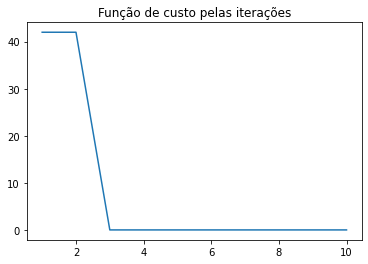

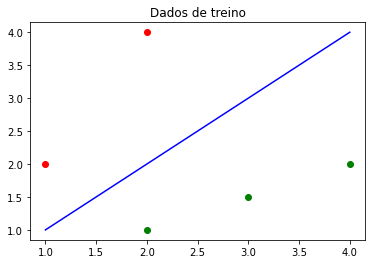

In [38]:
x = np.array([[1.0, 2.0], 
              [2.0, 4.0],
              [2.0, 1.0],
              [3.0, 1.5], 
              [4.0, 2.0]])

y = np.array([[-1],
              [-1],
              [ 1],
              [ 1],
              [ 1]])

perceptron = Perceptron(x, y)
cost = perceptron.train(max_iterations=20)
print(perceptron.getW())
print(perceptron.predict(x))

plt.title("Função de custo pelas iterações")
plt.plot(np.arange(len(cost)) + 1, cost)
plt.show()

plt.title("Dados de treino")

for i in range(x.shape[0]):
    if y[i] == -1:
        plt.plot(x[i,0], x[i,1], 'ro')
    else:
        plt.plot(x[i,0], x[i,1], 'go')

x_range, y_range = perceptron.getDecisionBoundary()
plt.plot(x_range, y_range, 'b-')

plt.show()

## ADALINE

In [39]:
class Adaline:

    # Inicializador
    def __init__(self, x, y, addBias = True, bias = 1):
        self.x = x
        if addBias:
            biasColumn = np.full((x.shape[0], 1), bias)
            self.x = np.concatenate((biasColumn, self.x), axis=1)
        self.y = y
        self.w = np.zeros(self.x.shape[1]).reshape(-1,1)
    
    # Setter
    def setXY(self, x, y):
        self.x = x
        self.y = y
        self.w = np.ones(self.x.shape[1]).reshape(-1,1)
    
    # Getters
    def getX(self):
        return self.x

    def getY(self):
        return self.y
    
    def getW(self):
        return self.w

    # Apenas para debug
    def getDecisionBoundary(self):
        # Extract the weights
        w0 = self.w[0]
        w1 = self.w[1]
        w2 = self.w[2]

        # Define the x range for plotting the decision boundary line
        x_range = np.linspace(np.min(self.x[:, 1]), np.max(self.x[:, 1]), 100)

        # Compute the corresponding y values for the decision boundary line
        y_range = (-w0 - w1 * x_range) / w2

        return x_range, y_range

    # Métodos

    def sign(self, z):
        newz = np.sign(z)
        newz[newz == 0] = 1
        return newz
    
    def cost(self):
        return (1/(2*self.x.shape[0])*((self.y-(self.x @ self.w))**2).sum())

    def train(self, alpha = 0.05, max_iterations = 100):
        e = np.zeros(self.y.shape)
        zero_error = np.zeros(e.shape)
        cost = np.array([])
        # iteration = 0

        for it in range(max_iterations):
            for i in range(self.x.shape[0]):
                yhat = self.x[i] @ self.w
                e[i] = self.y[i] - yhat
                self.w += (alpha * (e[i] * self.x[i])).reshape(-1,1)
                cost = np.append(cost, self.cost())
                # iteration += 1

            if np.array_equal(e, zero_error):
                break
        
        # print(iteration)

        return cost
    
    def predict(self, newX, addOnes = True):
        if addOnes:
            return np.sign(np.concatenate((np.ones((newX.shape[0], 1)), newX), axis=1) @ self.w)
        else:    
            return np.sign(newX @ self.w)


[[ 0.03579708]
 [ 0.48472866]
 [-0.49460115]]
[[-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]]


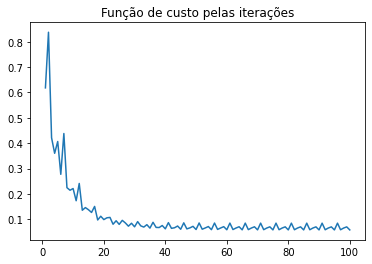

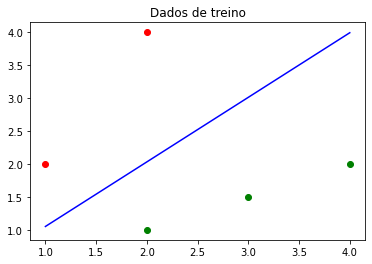

In [40]:
x = np.array([[1.0, 2.0], 
              [2.0, 4.0],
              [2.0, 1.0],
              [3.0, 1.5], 
              [4.0, 2.0]])

y = np.array([[-1],
              [-1],
              [ 1],
              [ 1],
              [ 1]])

perceptron = Adaline(x, y)
cost = perceptron.train(max_iterations=20)
print(perceptron.getW())
print(perceptron.predict(x))

plt.title("Função de custo pelas iterações")
plt.plot(np.arange(len(cost)) + 1, cost)
plt.show()

plt.title("Dados de treino")

for i in range(x.shape[0]):
    if y[i] == -1:
        plt.plot(x[i,0], x[i,1], 'ro')
    else:
        plt.plot(x[i,0], x[i,1], 'go')

x_range, y_range = perceptron.getDecisionBoundary()
plt.plot(x_range, y_range, 'b-')

plt.show()